In [1]:
# Imports
import os, json, random
import numpy as np
from IPython.display import JSON
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
Answer_Data = None   

with open(f'./Answers/1.json') as f:
    Answer_Data = json.load(f)

JSON(Answer_Data)

<IPython.core.display.JSON object>

In [3]:
All_answers = []

for scene in Answer_Data:
    if not 'scene_questions' in scene: continue
    lookups = [('scene_questions','scene'), ('effect_questions', 'effect'), ('total_questions', 'total')]
    for key,label in lookups:
        if label != 'scene' and scene['effect'] == None: continue
        for i,q in enumerate(scene[key]):
            All_answers.append({
                "scene" : scene['scene'],
                "effect": scene['effect'],
                "simulation": scene['sim'],
                "question" : q['q'],
                "truth": q['truth'],
                "marked": f"{label}-{i}" in scene['answers'][0]
            })
            
            
All_answers = pd.DataFrame(All_answers)
All_answers

,scene,effect,simulation,question,truth,marked
0,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is imposible...",False,False
1,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is certain t...",False,False
2,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is likely th...",True,True
3,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is certain t...",False,True
4,"In a simulation, there is a ball. It is placed...",None,1458370,"Across a fraction of a seccond, the ball will ...",False,True
...,...,...,...,...,...,...
415,"In a simulation, there is a ball which is quit...",None,772014,"After a fraction of a seccond, it is imposible...",False,False
416,"In a simulation, there is a ball which is quit...",None,772014,"After a fraction of a seccond, it is imposible...",True,False
417,"In a simulation, there is a ball which is quit...",None,772014,"After a few seconds of time, it is certain tha...",False,False
418,"In a simulation, there is a ball which is quit...",None,772014,"Across a fraction of a seccond, the ball will ...",False,False


In [4]:
All_answers[All_answers['truth'] == All_answers['marked']]

,scene,effect,simulation,question,truth,marked
0,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is imposible...",False,False
1,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is certain t...",False,False
2,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is likely th...",True,True
9,"In a simulation, there is a cube which is push...","After a little bit, the cube becomes quite heavy",7581701,"After a few seconds of time, it is reasonable ...",True,True
10,"In a simulation, there is a cube which is push...","After a little bit, the cube becomes quite heavy",7581701,"Across a fraction of a second, the cube will b...",False,False
...,...,...,...,...,...,...
413,"In a simulation, there is a ball. It is placed...",None,5532463,"Across a few seconds of time, the ball will no...",False,False
414,"In a simulation, there is a ball. It is placed...",None,5532463,"After a fraction of a second, it is imposible ...",True,True
415,"In a simulation, there is a ball which is quit...",None,772014,"After a fraction of a seccond, it is imposible...",False,False
417,"In a simulation, there is a ball which is quit...",None,772014,"After a few seconds of time, it is certain tha...",False,False


<AxesSubplot:>

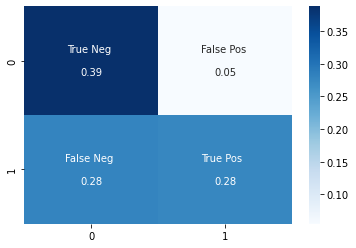

In [5]:
confusion = confusion_matrix(All_answers['truth'].to_numpy(), All_answers['marked'].to_numpy())
prct = confusion/np.sum(confusion)
labels = [
    f"True Neg \n\n{round(prct[0,0],2)}",
    f"False Pos \n\n{round(prct[0,1],2)}",
    f"False Neg \n\n{round(prct[1,0],2)}",
    f"True Pos  \n\n{round(prct[1,1],2)}"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(prct,fmt='', annot=labels, cmap='Blues')

In [6]:
All_answers['length'] = All_answers['scene'].str.len() 
All_answers['correct'] = All_answers['truth'] == All_answers['marked']

In [12]:
agreeable_answers = All_answers[All_answers['correct']]
agreeable_answers

,scene,effect,simulation,question,truth,marked,length,correct
0,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is imposible...",False,False,105,True
1,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is certain t...",False,False,105,True
2,"In a simulation, there is a ball. It is placed...",None,1458370,"After a fraction of a seccond, it is likely th...",True,True,105,True
9,"In a simulation, there is a cube which is push...","After a little bit, the cube becomes quite heavy",7581701,"After a few seconds of time, it is reasonable ...",True,True,133,True
10,"In a simulation, there is a cube which is push...","After a little bit, the cube becomes quite heavy",7581701,"Across a fraction of a second, the cube will b...",False,False,133,True
...,...,...,...,...,...,...,...,...
413,"In a simulation, there is a ball. It is placed...",None,5532463,"Across a few seconds of time, the ball will no...",False,False,105,True
414,"In a simulation, there is a ball. It is placed...",None,5532463,"After a fraction of a second, it is imposible ...",True,True,105,True
415,"In a simulation, there is a ball which is quit...",None,772014,"After a fraction of a seccond, it is imposible...",False,False,77,True
417,"In a simulation, there is a ball which is quit...",None,772014,"After a few seconds of time, it is certain tha...",False,False,77,True


In [13]:
agreeable_answers.to_csv('./best_data.csv')

(0.0, 1.1)

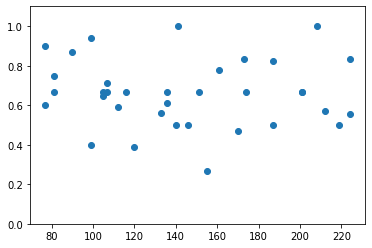

In [7]:
correct_percent = All_answers.groupby('scene').mean()
plt.scatter(correct_percent['length'], correct_percent['correct'])
plt.ylim((0,1.1))

In [8]:
premium_rows = correct_percent[correct_percent['correct']>0.7]

In [9]:
Premium_set = All_answers.join(premium_rows, how='inner', on='scene', lsuffix='_', rsuffix='_')
Premium_set

,scene,effect,simulation,question,truth_,marked_,length_,correct_,truth_,marked_,length_,correct_
22,"In a simulation, there is a cube (cube0), anot...",None,6674898,"After a few seconds of time, it is imposible t...",False,False,224,True,0.666667,0.500000,224,0.833333
23,"In a simulation, there is a cube (cube0), anot...",None,6674898,"After a fraction of a seccond, it is reasonabl...",True,True,224,True,0.666667,0.500000,224,0.833333
24,"In a simulation, there is a cube (cube0), anot...",None,6674898,"Across a fraction of a seccond, cube0 will not...",True,True,224,True,0.666667,0.500000,224,0.833333
25,"In a simulation, there is a cube (cube0), anot...",None,6674898,"After a few seconds of time, it is unlikely th...",True,False,224,False,0.666667,0.500000,224,0.833333
26,"In a simulation, there is a cube (cube0), anot...",None,6674898,"After a fraction of a seccond, it is unlikely ...",True,True,224,True,0.666667,0.500000,224,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
404,"In a simulation, there is a cube, a ball (ball...",None,5033113,"Across a fraction of a seccond, ball1 will beg...",False,False,208,True,0.333333,0.333333,208,1.000000
405,"In a simulation, there is a cube, a ball (ball...",None,5033113,"Across a fraction of a seccond, the cube will ...",False,False,208,True,0.333333,0.333333,208,1.000000
406,"In a simulation, there is a cube, a ball (ball...",None,5033113,"Across a fraction of a seccond, ball1 will beg...",False,False,208,True,0.333333,0.333333,208,1.000000
407,"In a simulation, there is a cube, a ball (ball...",None,5033113,"Across a fraction of a seccond, ball1 will beg...",False,False,208,True,0.333333,0.333333,208,1.000000
